# Module 1 Project Introduction
## Background Information on Ocean Acidficiation and Anthropogenic CO$_2$ <a id='topofdoc'></a>

[Today's Goal](#todaysgoal) : The goal of this notebook is to show how carbon pollution is causing ocean acidification. In addition, you will practice your skills importing data and plotting using R.

To make the notebook easy to execute, longer text information is provided through hyperlinks at the [bottom of this notebook](#INFOjupyternotebook).



### 1.1 [Motivation](#motivation) to study pH of oceans:


Your first data set is from Hawaii, where scientists measured the pH and atmospheric CO$_2$ concentration over many years. 

We will use this data to explore the rise in CO$_2$ and ocean acidification.

Together we'll watch a interview with Dr. Kaho Tisthammer, a previous post-doc at SFSU, who will tell about her research on the effect of pollutants on corals and the impacts of climate change on the oceans. 

<img src="images/coral-reefs-NatGeo.jpg" width=300 height=300 />
https://www.nationalgeographic.com/science/2020/06/scientists-work-to-save-coral-reefs-climate-change-marine-parks/

In [1]:
library(IRdisplay)

In [4]:
library(IRdisplay)
display_html('<iframe width="560" height="315" src="https://www.dropbox.com/s/9htp64w1kq37dpy/KahoTisthammerMovie.mp4?raw=1" frameborder="0" allow="accelerometer; autoplay = False ; encrypted-media; gyroscope; picture-in-picture;  type="video/mp4"" allowfullscreen></iframe>')

Later we'll watch another video from Professor Nicole Adelstein at SFSU to explain the chemistry behind pH and CO$_2$ concentration. Before we consider the theory behind ocean acidification, let's explore the data measured near Hawaii!

### 1.2 Data Provenance (citations): 

We will use a freely available [dataset](#epa) provided from the Environmental Protection Agency (EPA). The data gives the pH and CO$_2$ concentration in the ocean near Hawaii, the Canaray Islands, and Bermuda. Here is an example of the first 10 rows of data from Hawaii, opened with Excel and example plots given from the EPA's website.

What are some trends you see from the plots?

<img src="images/Excel_data.png" width=200 height=200 />
<img src="images/EDA-planning.png" width=500 height=500 />

We are eventually going to plot CO$_2$ versus pH, to examine the correlation. To start, we'll reproduce the lower left plot, pCO$_2$ versus time for Hawaii. Note, measurement of dissolved CO$_2$ is a partial pressure in micro-atmospheres. 

Note, the rise in CO$_2$ over the last couple hundred years has been proven to be from anthropogenic carbon (generated from humans). We need to figure out how to reduce our carbon output!

Of course, if you are familiar with Excel, you could make the plot with Excel. But we're here to learn how to write R code to analyze data!

### 1.3 Importing data:  we need to "get" the data to analyze it

Your instructors did a little bit of data cleaning when we downloaded the data from the EPA's website. You'll learn about data cleaning later in this course. When you import our cleaned data, the only thing you'll need to do is give each column a title.

Now we have a video describing data importation to watch. You can [read](#importdata) about it at the bottom of the document, too!

Once you have the data in a folder named Data, you will import it using the two input boxes below. 

Hopefully this data will already be uploaded to the Jupyter Hub and is located in a directory titled, Data. 

Reminder: Push SHIFT+ENTER in the cell below to save the variable name.

In [6]:
filename = "../Data/Hawaii-ocean-acidity.csv"

The general scheme needed to import data in a script is: 1) identify the structure of the data or set the structure, if you made the data. 2) Then identify the location of the data - its path on your computer. 3) Next, open that file in the script (generate a pointer to that file's location). 4) Read each line of the file or read it all at once. 5) Finally, save the data into appropriately named variables or a data frame
    
In R, we can do 4 and 5 in one line of code. 

ClimateData will be the name of the data frame where we store the data. 

read.csv is the function we use to read the data. 

filename is the location of the data (as we set in the previous cell). 

We also include the following two arguments: 

header = FALSE,
col.names  = c("Date","pH","pCO2") 

to set the names of the columns in the data frame. 

In [7]:
ClimateData <- read.csv(filename, header = FALSE, col.names  = c("Date","pH","pCO2"))

#### Viewing Dataframes

Use two the functions, str() and head() to make sure your import looks correct:

In [8]:
str(ClimateData)

'data.frame':	261 obs. of  3 variables:
 $ Date: num  1989 1989 1989 1989 1989 ...
 $ pH  : num  8.11 8.11 8.12 8.13 8.12 ...
 $ pCO2: num  331 331 324 311 318 ...


In [6]:
head(ClimateData)

Date,pH,pCO2
1988.833,8.1097,330.9
1988.921,8.1092,330.6
1989.022,8.1168,324.3
1989.156,8.1316,310.9
1989.236,8.1218,317.7
1989.378,8.1158,326.2


Use the format dataframename$columnname to view the contents of a column. Becareful if your dataframe is very large/long!

In [14]:
ClimateData$Date

[1] 1988.833 1988.921 1989.022 1989.156 1989.236 1989.378 1989.479 1989.575
  [9] 1989.647 1989.726 1989.797 1989.907 1990.014 1990.126 1990.214 1990.282
 [17] 1990.353 1990.449 1990.564 1990.704 1990.964 1991.093 1991.181 1991.274
 [25] 1991.351 1991.427 1991.523 1991.608 1991.715 1991.805 1991.934 1992.014
 [33] 1992.126 1992.180 1992.295 1992.440 1992.511 1992.596 1992.730 1992.803
 [41] 1992.899 1992.959 1993.055 1993.132 1993.288 1993.386 1993.707 1993.830
 [49] 1994.055 1994.132 1994.186 1994.466 1994.564 1994.663 1994.729 1994.789
 [57] 1994.885 1995.101 1995.173 1995.263 1995.348 1995.578 1995.660 1995.737
 [65] 1995.822 1995.879 1996.046 1996.238 1996.314 1996.391 1996.486 1996.571
 [73] 1996.639 1996.754 1996.831 1996.945 1997.022 1997.134 1997.195 1997.271
 [81] 1997.348 1997.425 1997.521 1997.586 1997.734 1997.929 1998.030 1998.137
 [89] 1998.211 1998.288 1998.364 1998.460 1998.537 1998.608 1998.742 1998.800
 [97] 1998.863 1998.940 1999.036 1999.134 1999.208 1999.285 1999.356 1999.534
[105] 1999.616 1999.789 1999.858 1999.956 2000.093 2000.167 2000.243 2000.320
[113] 2000.399 2000.473 2000.568 2000.645 2000.798 2000.915 2000.970 2001.047
[121] 2001.123 2001.219 2001.296 2001.373 2001.452 2001.526 2001.603 2001.753
[129] 2001.811 2001.879 2001.953 2002.044 2002.142 2002.197 2002.386 2002.493
[137] 2002.658 2002.767 2002.844 2002.901 2002.967 2003.047 2003.156 2003.241
[145] 2003.312 2003.386 2003.468 2003.551 2003.638 2003.789 2003.860 2003.970
[153] 2004.060 2004.153 2004.219 2004.306 2004.383 2004.459 2004.533 2004.626
[161] 2004.746 2004.833 2004.910 2004.973 2005.090 2005.175 2005.378 2005.455
[169] 2005.542 2005.619 2005.693 2005.773 2005.866 2005.951 2006.068 2006.126
[177] 2006.189 2006.252 2006.403 2006.452 2006.532 2006.605 2006.710 2006.805
[185] 2006.858 2006.942 2007.104 2007.219 2007.342 2007.518 2007.592 2007.674
[193] 2007.756 2007.921 2007.973 2008.082 2008.150 2008.407 2008.486 2008.571
[201] 2008.628 2008.779 2008.918 2009.058 2009.134 2009.326 2009.405 2009.507
[209] 2009.564 2009.633 2009.734 2009.844 2009.942 2010.189 2010.266 2010.381
[217] 2010.438 2010.521 2010.603 2010.677 2010.759 2010.890 2011.079 2011.164
[225] 2011.279 2011.356 2011.551 2011.663 2011.740 2011.847 2011.912 2011.970
[233] 2012.052 2012.232 2012.336 2012.415 2012.489 2012.585 2012.631 2012.708
[241] 2012.770 2012.926 2013.121 2013.181 2013.263 2013.378 2013.485 2013.699
[249] 2013.753 2013.825 2013.907 2013.973 2014.044 2014.126 2014.178 2014.277
[257] 2014.416 2014.499 2014.707 2014.786 2014.893

### 1.4 Practice Plotting

There are a number of things that we can do with this data!

First, let's see if the CO$_2$ concentration rose from 1990 to 2015. Combustion of fossil fuels has led to rising CO$_2$ concentrations in the atmosphere and dissolved in the ocean, which we can look for in this data. The fraction of dissolved CO$_2$ in the ocean is given a partial pressure given in micro-Atmospheres. Recall, ambient pressure is 1 Atm. 

We are going to use ggplot2, which we load together with other functions in the tidyverse library. 

In [4]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Below, we give you the code to plot the pCO$_2$ versus date.  Make sure you know the purpose of the syntax in the entire command. Ask a colleague or search the internet if you do not!

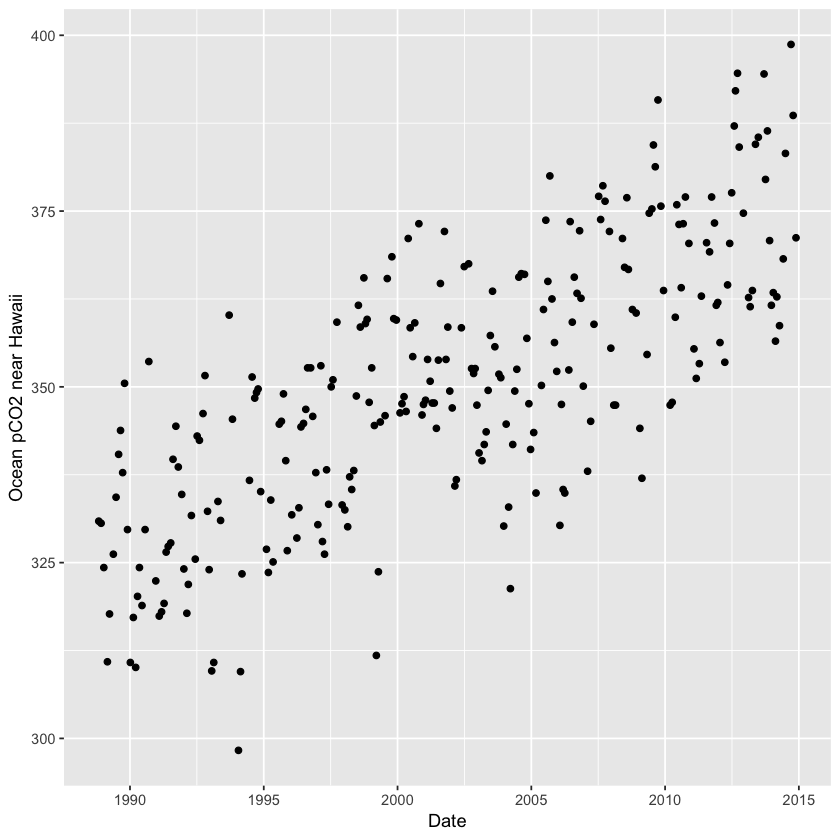

In [18]:
ggplot(ClimateData, aes(x = Date,y = pCO2)) + geom_point() +
xlab("Date") + ylab("Ocean pCO2 near Hawaii")

What do you think? Did the CO$_2$ partial pressure rise significantly?

### 1.4.1 Analyzing data with scripts - Motivation

The data that we plotted does not look like the EPA plots. 

Before learning to code, it's likely you would have generated the plot and anazlyed the data in an "amateur" way, in other words - manually. Many scientists tend to manually analyze their data using Office-like software tools. The most popular tools are Excel, Google Sheets, Mac's Numbers and Libre Office, for example. (Reference Gaston's notes!!!!!!!!!!!) 

You are learning powerful skills to use the text file of the data, write code, and work with a dynamic document (jupyter notebook) to analyze data.

We're sure you'll use the manual tools sometimes, but soon you can use your coding skills to be more effecient and creative. 

Once we have a small R script that will plot the date vs. pCO$_2$, we can easily change it to plot any of the columns against each other. We can also import the data from Bermuda and the Canary Islands, to compare all the locations.

In the next section, play around with ggplot's options to have the style of the plot match the plot on the EPA's website. 

### 1.5 Exploring plotting in R

We are using ggplot2, but R has another plotting function called plot(), which is actually the standard default.  

If you are interested, have a look at this paper https://onlinelibrary.wiley.com/doi/pdf/10.1111/jeb.12496. Professor Pleuni Pennings made all the figures in this paper with the plot() function. 

See https://www.dummies.com/programming/r/how-to-create-different-plot-types-in-r/)


INSTRUCTIONS: In addition to changing the style of the plot of pCO2 versus date, add a title, thicken the lines and decide which marker you like best. 

Put your code in the box below. Share your plot with colleagues and potentially add features that they used. 

In [ ]:
#Put code here!

### 1.5 Exploring data statistics in R

Let's find out some information about the data. In the Project for this Module, you will do statistical analyses of pCO2 data from estuaries around the country, so we are introducing some of the concepts here.

__To start, what is the range of years over which the data was taken?__

The data in the "Date" column can be accessed using the dollar sign and the column name: ClimateData$Date

We will use the summary() function to look at the range. 

In [5]:
#look at min and max using summary
summary(ClimateData$Date)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1989    1996    2002    2002    2008    2015 

The minimum and maximum of the data are determined using minimum and maximum functions, too.

In [6]:
print(paste("Mean Date ", mean(ClimateData$Date)))
print(paste("Minimum Date ", min(ClimateData$Date)))
print(paste("Maximum Date ", max(ClimateData$Date)))
print(paste("Standard Deviation Date ", sd(ClimateData$Date)))

[1] "Mean Date  2001.96441003448"
[1] "Minimum Date  1988.833333"
[1] "Maximum Date  2014.893151"
[1] "Standard Deviation Date  7.43378655535459"


Note that the day and month are represented by the decimal - conceptually as a fraction of the year. Consider how you could represent January 2, 1988 (which is not included in the data set). 

__Which date was the first measurement taken?__

In [8]:
1988+2./365.

[1] 1988.005

#### The summary function
R also has functions to compute the average and standard deviation of the data. I computed them and the min and max for the pH data below. 

In [9]:
summary(ClimateData$pH)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  8.042   8.079   8.089   8.091   8.104   8.151 

In [10]:
print(paste("Standard Deviation pH ", sd(ClimateData$pH)))

[1] "Standard Deviation pH  0.0192785952903471"


#### Box Plot introduction
The summary function also prints a quantity called the 3rd Quartile (3rd Qu.). 

We'll use the image below to describe the 3rd Qu., which was taken from wikipedia: By Jhguch at en.wikipedia, CC BY-SA 2.5, https://commons.wikimedia.org/w/index.php?curid=14524285

<img src="images/Boxplot_vs_PDF.svg" width=500 height=500 />

In this plot, there is a normal distribution of the data. The values of the data are not shown. Instead, the x-axis is plotted in $\sigma$, which is the standard deviation of the data from the mean. At the center distribution, there is no deviation from the mean = 0$\sigma$. 

A quartile gives 25% of the data. In other words, 25% of the lower valued data lies within the 1st quartile, 25% of the data lies in the 2nd quartile, 25% of the data lies in the 3rd quartile, and 25% of the highest valued data lies in the 4th quartile. 

The 3rd quartile number reported from the summary() function, tells you that 25% of the data has values above that number. 

IQR is the inter quartile range. 50% of the data lies in the IQR, which is a common region to plot with a box plot!





### 1.6 The ocean is acidifying - its pH is getting lower!

Now we'll watch a video that will describe the relationship between atmosphere CO$_2$ concentration to pH in the oceans.


In [4]:
display_html('<iframe width="560" height="315" src="https://www.dropbox.com/s/yqa1i1oyzae8qfz/pCO2_pH_lecture.mp4?raw=1" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; autoplay = False ; picture-in-picture;  type="video/mp4"" allowfullscreen></iframe>')

#### Insights from plots versus statstics


Recall from above, standard deviation in the pH data is 0.019. 

As an initial guess, we might think that any values in the range of 8.07 to 8.11 are close to the mean - within one standard deviaition. You can see in the "summary" output that the 1st and 3rd Quartiles give a similar range.  


In the cell below, calculate the mean, maximum value, minimum value, and standard deviation of the CO$_2$ concentration data. 

In [13]:
summary(ClimateData$pCO2)
print(paste("Standard Deviation pCO2 ", sd(ClimateData$pCO2)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  298.3   336.8   350.1   350.4   363.4   398.7 

[1] "Standard Deviation pCO2  19.0464372568209"


Note the minimum and maximum pH values are larger than one standard deviation of the mean. But this analysis hides a lot of interesting structure within the data, which we can better observe by plotting.

#### 1.6.1 Plotting pH vs. CO2

So far, we have plotted CO$_2$ versus time. Insert a cell below and plot the pH versus time.

Now that we can see the data, calculating standard deviation of the entire data set does not make a lot of sense.

It would be better to determine the standard deviation of the average pH during a year and ALSO the standard deviation during a given year. You will do these analyses in the Module Project!

We can ask why the pH varies so much during the year. Recall that the pH and CO$_2$ seemed to be inversely correlated. In both data sets, there is a lot of noise.

What is the cause of the periodic fluctuations in the data? Discuss! 

We see that as the pCO$_2$ increases, the pH decreases. There is a cyclical variation in the pCO$_2$ over a year, but it has risen during the last 30 years. We also know that the pCO$_2$ has risen steeply since the industrial revolution (slides). 

Do you think there will still be the yearly fluctuations if we plot pH versus pCO$_2$? Make a prediction and discuss.

INSTUCTIONS: Now make a scatter plot! Plot the pH versus pCO$_2$:

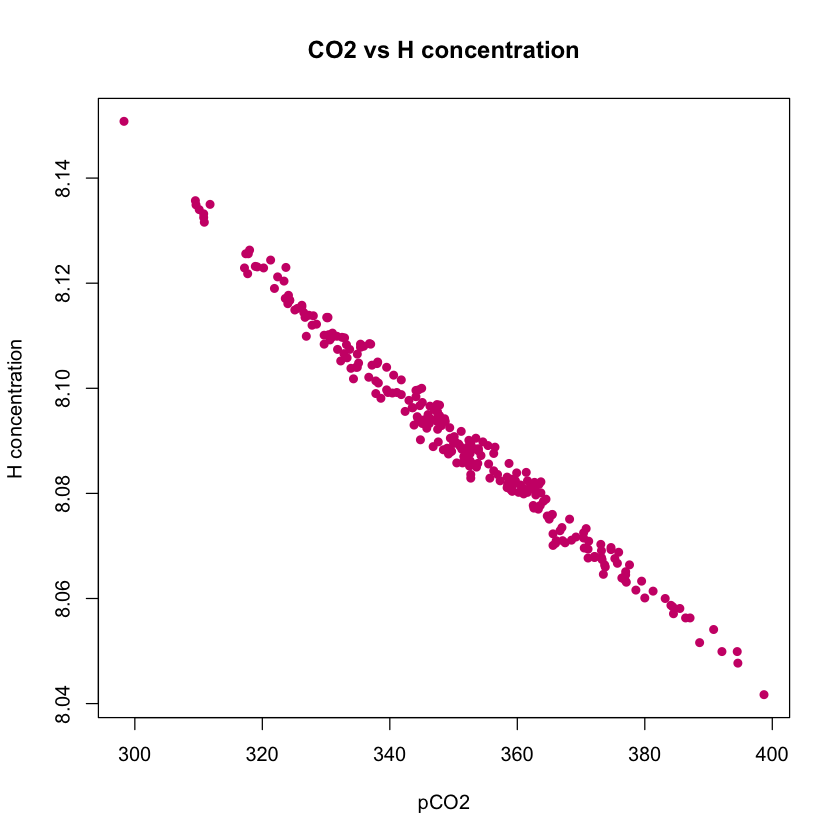

In [18]:
#Here we plot points, hence type = "p". pch = 16 makes them solid.
plot(ClimateData$pCO2,ClimateData$pH, xlab="pCO2", ylab="H concentration", type="p",pch=16,
     main="CO2 vs H concentration", col="deeppink3",lwd=3)


Look at your plot of pH versus pCO$_2$. Do you think the relationship is linear? 


#### Chemistry background on pH and acidity

Do you think that there is a more linear relationship between pH and pCO$_2$ or the concentration of H$^+$? Discuss with your neighbor and consider the video showing what happens when CO$_2$ reacts with water. 

We can determine this relationships or the correlation between the data using more statistical analysis.

First, let's convert the pH data into $[H^+]$ concentration using the following equations:

$$pH = -log_{10}([H^+])$$

$$[H^+] = 10^{(-pH)}$$

In [ ]:
ClimateData$Hconcentration = 10**(-1*ClimateData$pH)

In R, to compute $x^y$, two stars are used to indicate the exponent, as $x**y$. We can add this piece of information as a new column in the data frame. Let's call the new column Hconcentration. Creating a new column, based on info from an existing column is easy in R. 

In [ ]:
plot(ClimateData$pCO2,ClimateData$Hconcentration, xlab="pCO2", ylab="H concentration", type="p",pch=16,
     main="CO2 vs H concentration", col="deeppink3",lwd=3)

Because I expect there to be a linear relationship between pCO$_2$ and concentration of H$^+$, I plotted $[H^+]$ rather than the pH against the pCO$_2$.

How does the plot of pH versus pCO$_2$ compare to the plot of $[H^+]$ versus pCO$_2$?

## More information is included below

Hyperlinks in the jupyter notebook connect the code with the information below. 

[Top of the Document](#topofdoc)

#### Information on today's goal:  <a id='todaysgoal'></a> 

Hopefully you are familiar with importing data and creating scatter plots using ggplot2. Please go back and review if necessary.

The Module 1 Project will explore data of pH and CO$_2$ concentrations from estuaries around the country, focusing on the daily and seasonal changes in CO$_2$ concentration. The goal of this background notebook is to familiarize you with the relationship between ocean acidification, pH, and CO$_2$. 

<a id='INFOjupyternotebook'></a> 
#### Information on jupyter notebooks:



 Jupyter Notebooks are a great way to analyze data, providing a document where scientists can view data, write code to analyze their data, and visualize their data or analyses. It is also a great way to comment and annotate code.

At the beginning of most notebooks, modules should be uploaded, or the modules can be uploaded with the section of code that depends on them. 

In a jupyter notebook, pieces of code are entered via cells. One can run all the cells from the top, or run individual cells, one at a time. Variables in the cells are stored in memory.

<a id='motivation'></a>
#### Motivation to study climate data

Global warming due to our atmospheric pollution is one of the most urgent crisis facing us today. Increased CO$_2$ in the atmosphere and rising temperatures have a cascading effect that will effect all life and ecosystems. Biologists, chemists, and physicists can all do their part to study climate change and find solutions to the problems caused by the changing climate. Scientists, especially, should be familiar with the data, whether or not our particular discipline focuses on climate change. We need to be able to talk to our friends and family about the global climate crisis, to build political willpower to enact solutions.

One effect of increased CO$_2$ concentration in the atmosphere is increased uptake of CO$_2$ into the oceans. Higher concentrations of CO$_2$ cause acidification of the oceans and a lowering of the ocean's pH. The lower pH affects many animals and plants, especially coral reefs. We will start by looking at how much the concentration of CO$_2$ and pH has changed.

<a id='tisthammer'></a> 

<a id='epa'></a>
#### Data Provinance 

The Environmental Protection Agency (EPA) has collated the data and make them available to the public from the following website:
    
    https://www.epa.gov/climate-indicators/climate-change-indicators-ocean-acidity
    
The data for each of these locations consist of a date, a ocean pH measurement, and the partial pressure of CO$_2$ in partial atmospheres. We downloaded the data on January 15th 2020. 

It is important to cite and record where you download or recieve data from!

#### Chemistry background


Please see this
<a href="https://chem.libretexts.org/Bookshelves/Introductory_Chemistry/Book%3A_Chemistry_for_Allied_Health_(Soult)/09%3A_Properties_of_Solutions/9.6%3A_The_pH_Concept">link</a> to read more about pH or this <a href="https://chem.libretexts.org/Bookshelves/General_Chemistry/Map%3A_Chemistry_-_The_Central_Science_(Brown_et_al.)/10%3A_Gases/10.6%3A_Gas_Mixtures_and_Partial_Pressures">link</a> to read about partial atmospheres. 



<a id='importdata'></a>
#### Importing data with R

We edited the data that was downloaded from the internet so that it is easier to import. In future lessons, you will learn more about how to format and organize data according to best practices. For this lesson, we'll just import the data from Hawaii that was already "cleaned" for you. The downloaded data have a structure, which is important to identify before importing. 

One can open data in a number of ways, to identify the structure, if it is not known. To save a step, we give you the structure of the Hawaii-ocean-acitivity.csv file here:

The csv file has three columns. These three columns contain the date, pH, and pCO$_2$ from Hawaii. There is no header row. 

Our data will be imported from a csv file (comma separated variables). R has a function, called read.csv to help import csv files, so we'll load (import) the data using that function. The data will then be stored in a data structure that's called a "data frame." Data frames are very useful data structures in R (and Python). Here's a link to read more about data frames: https://www.tutorialspoint.com/r/r_data_frames.htm. This tutorial begins with: "A data frame is a table or a two-dimensional array-like structure in which each column contains values of one variable and each row contains one set of values from each column."

In order to import data, we need to tell our script where to find the data on our computer. Your data should be stored in a folder that is separate from your analyses and output. 

Create a folder (directory) named Data each time you start a project and keep your raw data there. 